In [96]:
# Movie Classifier
from keras.datasets import reuters
from keras import models, layers, optimizers, metrics, losses
import matplotlib.pyplot as plt


In [97]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [98]:
# 3.2 Prepare the data
import numpy as np

def vectorise_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions)) # All-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1                     # sets specific indices to 1s
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [99]:
# Vectorise the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Alternative method with Keras
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [100]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [101]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])


In [102]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=9, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 32ms/step - loss: 2.6582 - accuracy: 0.5065 - val_loss: 1.7639 - val_accuracy: 0.6110
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.5102 - accuracy: 0.6735 - val_loss: 1.3608 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.1657 - accuracy: 0.7484 - val_loss: 1.1739 - val_accuracy: 0.7300
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.9507 - accuracy: 0.7950 - val_loss: 1.0571 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.7878 - accuracy: 0.8297 - val_loss: 0.9819 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.6580 - accuracy: 0.8583 - val_loss: 0.9254 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5542 - accuracy: 0.8824 - val_loss: 0.9151 - val_accuracy: 0.7930
Epoch 8/9
16/16 [===

In [103]:
result = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9593 - accuracy: 0.7765


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


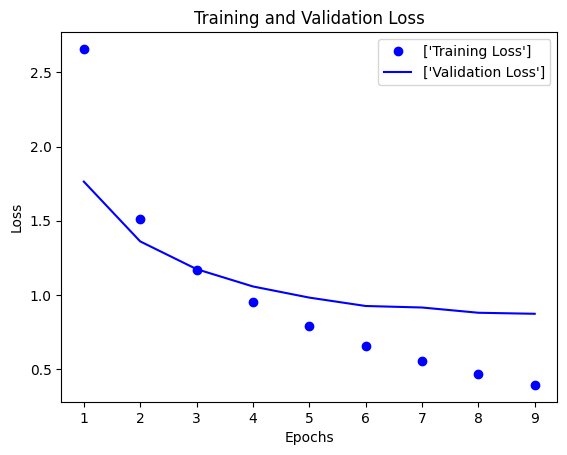

In [104]:
# Plotting train vs validation
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label=['Training Loss'])
plt.plot(epochs, val_loss, 'b', label=['Validation Loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


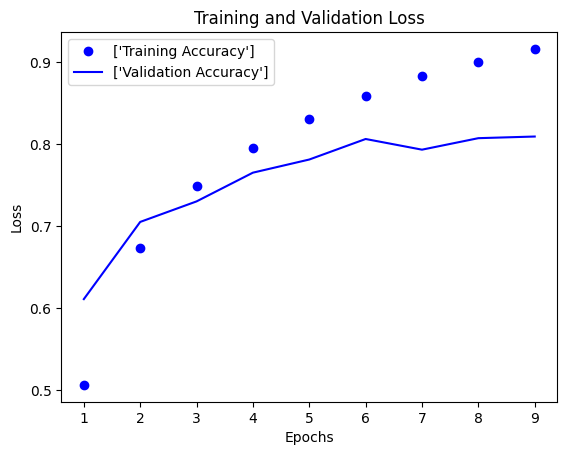

In [105]:
# Plotting train vs validation
plt.clf()

history_dict = history.history
# history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label=['Training Accuracy'])
plt.plot(epochs, val_acc, 'b', label=['Validation Accuracy'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [110]:
# Prediction 3.4.5
model.predict(x_test) 


71/71 [==============================] - 0s 2ms/step


array([[3.2223390e-05, 5.6219305e-04, 3.1610575e-06, ..., 2.6582407e-05,
        1.0553949e-06, 1.0864007e-05],
       [8.4822311e-04, 3.3811712e-01, 1.2758463e-02, ..., 2.9137224e-04,
        1.2558630e-04, 1.2384909e-04],
       [1.1556228e-03, 9.3071944e-01, 1.2603463e-03, ..., 3.8212913e-04,
        8.1199576e-04, 2.2631271e-04],
       ...,
       [5.3049247e-05, 3.8163745e-04, 5.1829258e-05, ..., 1.2229850e-04,
        2.3722896e-05, 3.6427406e-05],
       [1.7897385e-03, 5.0683286e-02, 6.1588309e-04, ..., 4.4513590e-04,
        1.8652029e-04, 7.3286542e-04],
       [8.8431308e-04, 7.3796326e-01, 8.3413590e-03, ..., 5.3386932e-04,
        1.6300156e-03, 2.0145155e-04]], dtype=float32)